# Task 1 : Sentiment Distribution by Rating Group (Stacked Bar Chart)

In [ ]:
# Task : 
Visualize the sentiment distribution (positive, neutral, negative) of user reviews using a stacked bar chart, 
segmented by rating groups (e.g., 1-2 stars, 3-4 stars, 4-5 stars). Include only apps with more than 1,000 
reviews and group by the top 5 categories.

In [65]:
# Import Libraries 
from datetime import datetime, timezone, timedelta
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import webbrowser
import os

In [2]:
# Load Clean Apps dataset that already cleaned by previous pandas queries(code)
app_df = pd.read_csv("D:/Google Play Store Intern/Clean Play Store Data.csv")
app_df.head(3)

,App,Category,Rating,Reviews,SizeInMB,Installs,Type,PriceInDollar,Content Rating,Genres,Last Updated,Update_Year,Revenue,Log_Installs,Log_Reviews,Rating_group
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.5,27.0,3.6,500,Free,0.0,Everyone,Sports,2017-10-07,2017,0.0,6.214608,3.295837,Top Rated Appa
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467.0,22.0,1000000,Free,0.0,Everyone,Social,2018-08-02,2018,0.0,13.815511,10.608242,Top Rated Appa
2,- Free Comics - Comic Apps,COMICS,3.5,115.0,9.1,10000,Free,0.0,Mature 17+,Comics,2018-07-13,2018,0.0,9.210340,4.744932,Above Average Rated Apps


In [3]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   SizeInMB        8120 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   PriceInDollar   9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Update_Year     9659 non-null   int64  
 12  Revenue         9659 non-null   float64
 13  Log_Installs    9659 non-null   float64
 14  Log_Reviews     9659 non-null   float64
 15  Rating_group    9659 non-null   object 
dtypes: float64(7), int64(2), object(7)
memory usage: 1.2+ MB


In [9]:
app_df.drop(columns = ['Log_Installs', 'Log_Reviews'],inplace = True) # remove unnecessary colums

In [10]:
app_df.describe()

,Rating,Reviews,SizeInMB,Installs,PriceInDollar,Update_Year,Revenue
count,9659.000000,9.659000e+03,8120.000000,9.659000e+03,9659.000000,9659.000000,9.659000e+03
mean,4.175961,2.166345e+05,21.162611,7.777507e+06,1.099299,2017.345688,3.014231e+04
std,0.567046,1.831136e+06,21.882333,5.375828e+07,16.852152,1.137600,8.716572e+05
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,2010.000000,0.000000e+00
25%,4.000000,2.500000e+01,5.100000,1.000000e+03,0.000000,2017.000000,0.000000e+00
50%,4.300000,9.690000e+02,13.000000,1.000000e+05,0.000000,2018.000000,0.000000e+00
75%,4.500000,2.942550e+04,29.000000,1.000000e+06,0.000000,2018.000000,0.000000e+00
max,5.000000,7.814326e+07,100.000000,1.000000e+09,400.000000,2018.000000,6.990000e+07


In [11]:
# Load Clean Review dataset that already cleaned by previous pandas queries(code)
review_df = pd.read_csv("D:/Google Play Store Intern/Clean User Reviews.csv")
review_df.head()

,App,Total_Review,Avg_Polarity,Avg_Subjectivity,Avg_Sentiment_Score,Negative_Review,Neutral_Review,Positive_Review
0,10 Best Foods for You,194,0.470733,0.495455,0.505611,10,22,162
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,40,0.392405,0.545516,0.472627,1,8,31
2,11st,39,0.185943,0.455340,0.136292,7,9,23
3,1800 Contacts - Lens Store,80,0.318145,0.591098,0.519508,6,10,64
4,1LINE – One Line with One Touch,38,0.196290,0.557315,0.338368,8,3,27


In [6]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   App                  865 non-null    object 
 1   Total_Review         865 non-null    int64  
 2   Avg_Polarity         865 non-null    float64
 3   Avg_Subjectivity     865 non-null    float64
 4   Avg_Sentiment_Score  865 non-null    float64
 5   Negative_Review      865 non-null    int64  
 6   Neutral_Review       865 non-null    int64  
 7   Positive_Review      865 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 54.2+ KB


In [12]:
# merge both dataset (apps dataset and review dataset )
merge_df = pd.merge(app_df, review_df, on = 'App',how = 'left')

In [13]:
merge_df.shape

(9659, 21)

In [14]:
Columns = merge_df.columns.tolist()
Columns

['App',
 'Category',
 'Rating',
 'Reviews',
 'SizeInMB',
 'Installs',
 'Type',
 'PriceInDollar',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Update_Year',
 'Revenue',
 'Rating_group',
 'Total_Review',
 'Avg_Polarity',
 'Avg_Subjectivity',
 'Avg_Sentiment_Score',
 'Negative_Review',
 'Neutral_Review',
 'Positive_Review']

In [15]:
merge_df.head(3)

,App,Category,Rating,Reviews,SizeInMB,Installs,Type,PriceInDollar,Content Rating,Genres,...,Update_Year,Revenue,Rating_group,Total_Review,Avg_Polarity,Avg_Subjectivity,Avg_Sentiment_Score,Negative_Review,Neutral_Review,Positive_Review
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.5,27.0,3.6,500,Free,0.0,Everyone,Sports,...,2017,0.0,Top Rated Appa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467.0,22.0,1000000,Free,0.0,Everyone,Social,...,2018,0.0,Top Rated Appa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,- Free Comics - Comic Apps,COMICS,3.5,115.0,9.1,10000,Free,0.0,Mature 17+,Comics,...,2018,0.0,Above Average Rated Apps,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Filter: Apps with more than 1000 total user reviews and valid ratings
filtered_df = merge_df[
    (merge_df['Reviews'] > 1000) &
    (merge_df['Rating'].notna()) &
    (merge_df['Category'].notna())
]

In [17]:
Top_5Category = filtered_df['Category'].value_counts().nlargest(5).index
filtered_df = filtered_df[filtered_df['Category'].isin(Top_5Category)]

In [18]:
def get_rating_group(rating):
    if rating <= 2.0:
       return "1-2 Stars"
    elif rating <= 4.0:
        return "3-4 Stars"
    else:
       return "4-5 Stars"
filtered_df['Rating Group'] = filtered_df['Rating'].apply(get_rating_group)  

In [19]:
# Group by Category and Rating Group, sum review sentiments
grouped = filtered_df.groupby(['Category', 'Rating Group'])[['Negative_Review','Positive_Review','Neutral_Review']].sum().reset_index()

In [20]:
# Melt for stacked bar chart
melted = pd.melt(grouped, id_vars = ['Category', 'Rating Group'], 
                 value_vars=['Positive_Review', 'Negative_Review', 'Neutral_Review'],
                 var_name = 'Sentiment', value_name = 'Review Count')

In [21]:
# Combine Category and rating group for x-axis
melted['Category_Rating'] = melted['Category'] + ' - ' + melted['Rating Group']

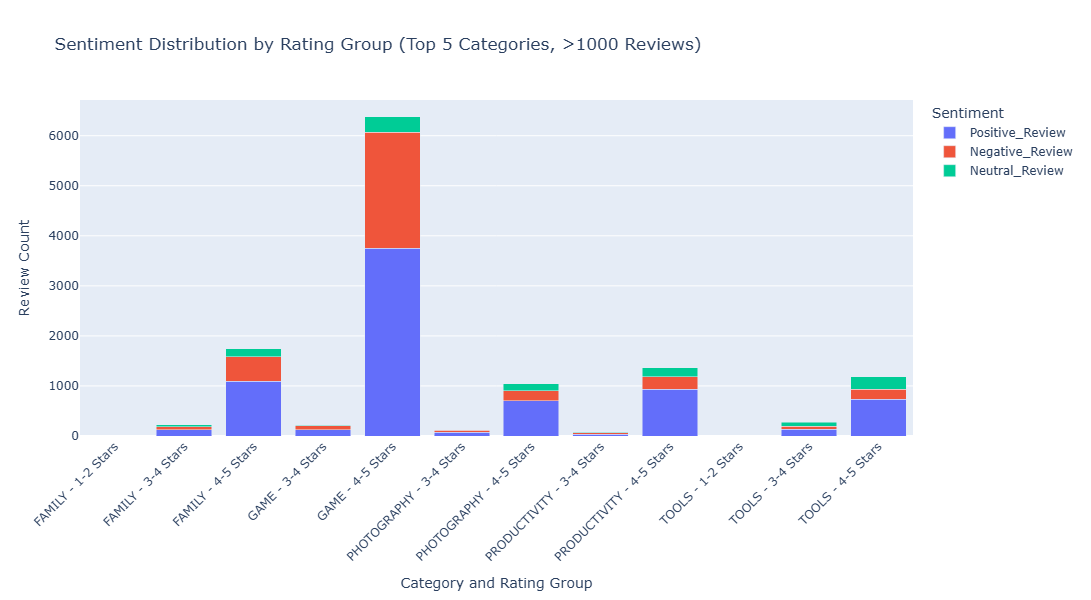

In [22]:
fig = px.bar(
    melted,
    x = 'Category_Rating',
    y = 'Review Count',
    color="Sentiment",
    title="Sentiment Distribution by Rating Group (Top 5 Categories, >1000 Reviews)",
    labels = {"Category_Rating": "Category and Rating Group"},
    barmode='stack',
    height=600
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [ ]:
Result of task 1:
Positive sentiment dominates in higher-rated apps (4–5 stars)
Neutral and negative sentiments are more frequent in apps rated 1–2 stars
Categories like games, family, and productivity featured among the top 5
Visualization helps identify user satisfaction trends by rating and category

# Task 2: Grouped Bar Chart of Average Rating vs Total Reviews (Top 10 Categories by Installs)

In [ ]:
# Task : 
Use a grouped bar chart to compare the average rating and total review count for the top 10 app categories by number of installs. 
Filter out any categories where the average rating is below 4.0 and size below 10 M and last update should be Jan month 
this graph should work only between 3PM IST to 5 PM IST apart from that time we should not show this graph in dashboard itself.

In [44]:
app_df = pd.read_csv("D:/Google Play Store Intern/Clean Play Store Data.csv")

In [45]:
app_df = app_df.dropna(subset = ['Category', 'Rating', 'Reviews', 'SizeInMB','Installs' ,'Last Updated'])

In [46]:
# Convert Last Updated to datetime
app_df['Last Updated'] = pd.to_datetime(app_df['Last Updated'], errors = 'coerce')
app_df['Updated_Month'] = app_df['Last Updated'].dt.month

In [48]:
filtered = app_df[
    (app_df['Rating'] >= 4.0) &
    (app_df['SizeInMB'] >= 10) &
    (app_df['Updated_Month'] == 1) 
]

In [49]:
filtered.head()

,App,Category,Rating,Reviews,SizeInMB,Installs,Type,PriceInDollar,Content Rating,Genres,Last Updated,Update_Year,Revenue,Log_Installs,Log_Reviews,Rating_group,Updated_Month
17,12 Step Meditations & Sober Prayers AA NA AL-ANON,LIFESTYLE,4.7,759.0,15.0,50000,Free,0.0,Everyone 10+,Lifestyle,2018-01-22,2018,0.0,10.819778,6.632002,Top Rated Appa,1
59,3D Bowling,SPORTS,4.1,1076243.0,13.0,100000000,Free,0.0,Everyone,Sports,2018-01-18,2018,0.0,18.420681,13.888987,Top Rated Appa,1
119,A-J Media Vault,BOOKS_AND_REFERENCE,4.0,1.0,24.0,50,Free,0.0,Everyone,Books & Reference,2017-01-04,2017,0.0,3.912023,0.000000,Top Rated Appa,1
189,AE Angry Chef,GAME,4.1,533.0,39.0,10000,Free,0.0,Everyone 10+,Action,2014-01-24,2014,0.0,9.210340,6.278521,Top Rated Appa,1
211,AE Solitaire,GAME,4.3,1776.0,26.0,50000,Free,0.0,Everyone,Card,2018-01-04,2018,0.0,10.819778,7.482119,Top Rated Appa,1


In [50]:
grouped = filtered.groupby('Category').agg({
    'Installs': 'sum',
    'Rating': 'mean',
    'Reviews': 'sum'
}).reset_index()

In [51]:
# Top 10 categories by installs
top_categories = grouped.nlargest(10, 'Installs')

In [52]:
# Time condition: 3PM to 5PM IST
now_utc = datetime.now(timezone.utc)
now_ist = now_utc + timedelta(hours=5, minutes=30)
hour_ist = now_ist.hour


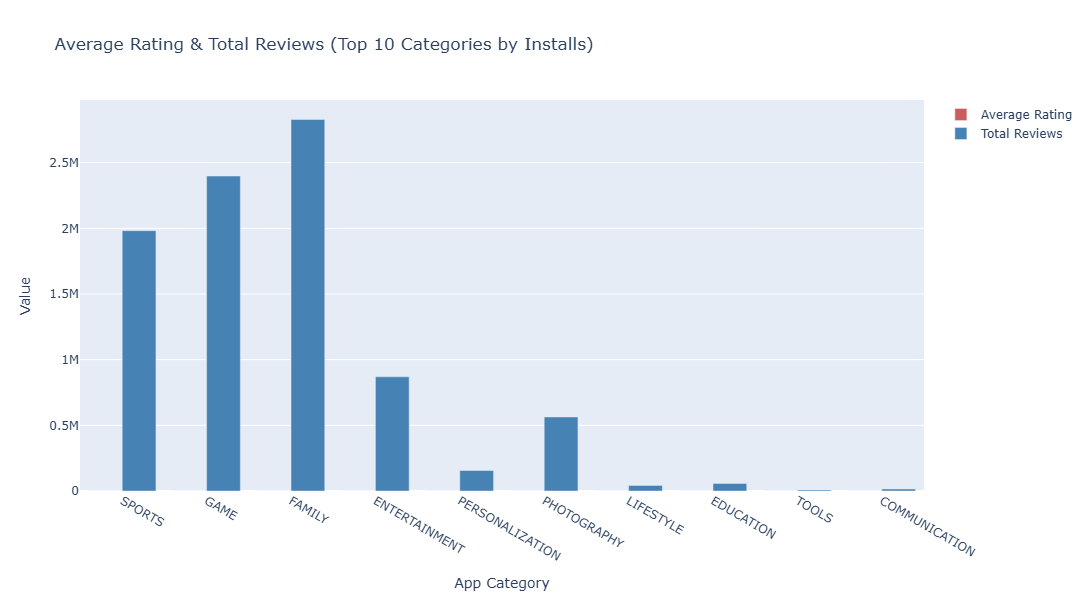

In [62]:
# Create chart only if time is between 3 PM and 5 PM IST
if 15 <= hour_ist < 17:
    fig = go.Figure()
    
    fig.add_trace(go.Bar(
        x=top_categories['Category'],
        y=top_categories['Rating'],
        name='Average Rating',
        marker_color='indianred'
    ))
    
    
    fig.add_trace(go.Bar(
        x=top_categories['Category'],
        y=top_categories['Reviews'],
        name='Total Reviews',
        marker_color='steelblue'
    ))
    
    fig.update_layout(
        title="Average Rating & Total Reviews (Top 10 Categories by Installs)",
        xaxis_title="App Category",
        yaxis_title="Value",
        barmode='group',
        height=600
    )
    fig.show()
else:
    output = f"⏱️ Current IST time: {now_ist.strftime('%H:%M:%S')} — Outside 3PM-5PM IST window. Chart is hidden."
output

In [ ]:
Result of Task 2:
Categories like Game and family had high total review counts
Average rating bar was initially hidden due to scale differences
Chart now shows average rating (0–5 scale) vs review count (in millions) clearly
Dynamic time-based dashboard condition was successfully implemented

# Task 3: Time Series of Installs by Category with Growth Highlights 

In [ ]:
# Task : 
Plot a time series line chart to show the trend of total installs over time, segmented by app category. Highlight periods of 
significant growth by shading the areas under the curve where the increase in installs exceeds 20% month-over-month and app name 
should not starts with x, y ,z and app category should start with letter " E " or " C " or " B " and We have to translate the Beauty 
category in Hindi and Business category in Tamil and Dating category in German while showing it on Graph. reviews should be more 
than 500 the app name should not contain letter "S" as well as this graph should work only between 6 PM IST to 9 PM IST apart 
from that time we should not show this graph in dashboard itself

In [71]:
App_df = pd.read_csv("D:/Google Play Store Intern/Clean Play Store Data.csv")

In [72]:
# Convert Last Updated to datetime
App_df['Last Updated'] = pd.to_datetime(App_df['Last Updated'], errors='coerce')
App_df['Month'] = App_df['Last Updated'].dt.month

In [73]:
# Filtering conditions
filtered = App_df[
    (App_df['Reviews'] > 500)&
    (~App_df["App"].str.startswith(('x', 'y', 'z', 'X', 'Y', 'Z')))&
    (~App_df["App"].str.contains('s',case = False))&
    (App_df['Category'].str.startswith(('E', 'C', 'B')))
]

In [74]:
# Translate categories
category_translation = {
    'BEAUTY': 'सौंदर्य',        # Hindi
    'BUSINESS': 'வணிகம்',       # Tamil
    'DATING': 'Partnersuche'    # German
}

In [ ]:
filtered['Translated Category'] = filtered['Category'].str.upper().replace(category_translation)
filtered['Translated Category'] = filtered['Translated Category'].fillna(filtered['Category'])

In [76]:
filtered.head(3)

,App,Category,Rating,Reviews,SizeInMB,Installs,Type,PriceInDollar,Content Rating,Genres,Last Updated,Update_Year,Revenue,Log_Installs,Log_Reviews,Rating_group,Month,Translated Category
4,/u/app,COMMUNICATION,4.7,573.0,53.0,10000,Free,0.0,Mature 17+,Communication,2018-07-03,2018,0.0,9.210340,6.350886,Top Rated Appa,7,COMMUNICATION
156,AC Freedom,BUSINESS,3.5,537.0,NaN,100000,Free,0.0,Everyone,Business,2018-05-25,2018,0.0,11.512925,6.285998,Above Average Rated Apps,5,வணிகம்
383,AT&T Call Protect,COMMUNICATION,4.2,6454.0,15.0,5000000,Free,0.0,Everyone,Communication,2018-05-03,2018,0.0,15.424948,8.772455,Top Rated Appa,5,COMMUNICATION


In [77]:
# Group by Month and Category
grouped = filtered.groupby(['Month', 'Translated Category'])['Installs'].sum().reset_index()


In [78]:
# Calculate MoM growth
grouped = grouped.sort_values(['Translated Category', 'Month'])
grouped['Prev_Installs'] = grouped.groupby('Translated Category')['Installs'].shift(1)
grouped['MoM_Growth'] = (grouped['Installs'] - grouped['Prev_Installs']) / grouped['Prev_Installs']
grouped['Highlight'] = grouped['MoM_Growth'] > 0.20

In [79]:
# Time condition check: 6 PM to 9 PM IST
now_utc = datetime.now(timezone.utc)
now_ist = now_utc + timedelta(hours=5, minutes=30)
hour_ist = now_ist.hour

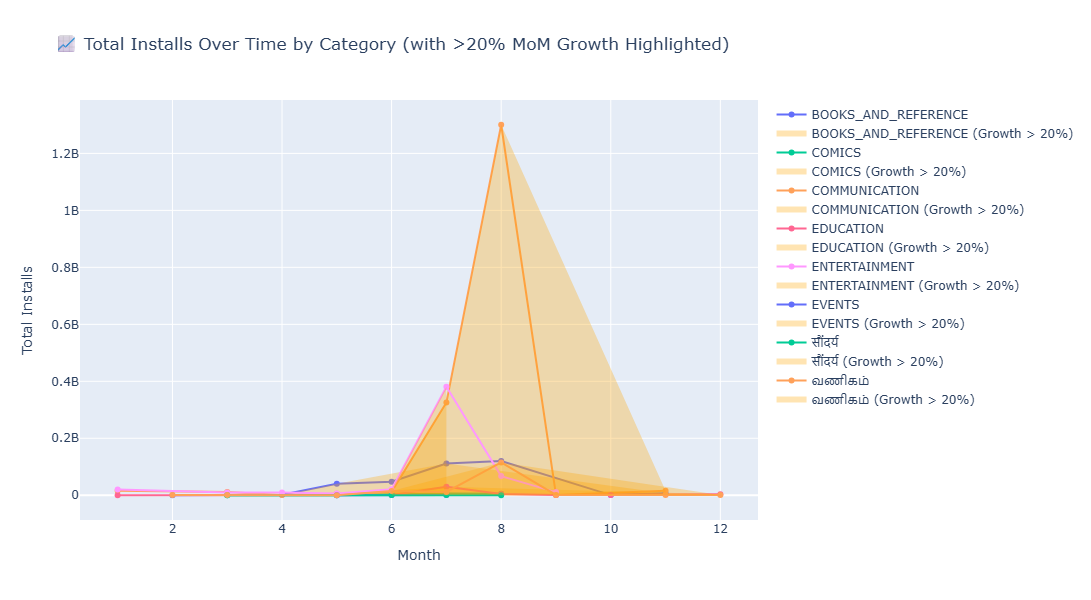

In [80]:
if 18 <= hour_ist < 21:
    fig = go.Figure()
    
    # Plot each category line
    for category in grouped['Translated Category'].unique():
        cat_data = grouped[grouped['Translated Category'] == category]
        
        fig.add_trace(go.Scatter(
            x=cat_data['Month'],
            y=cat_data['Installs'],
            mode='lines+markers',
            name=category
        ))
    
        # Add shaded areas for growth > 20%
        highlight_data = cat_data[cat_data['Highlight']]
        if not highlight_data.empty:
            fig.add_trace(go.Scatter(
                x=highlight_data['Month'],
                y=highlight_data['Installs'],
                fill='tozeroy',
                mode='none',
                name=f"{category} (Growth > 20%)",
                fillcolor='rgba(255, 165, 0, 0.3)',
                showlegend=True
            ))
    
    fig.update_layout(
        title="📈 Total Installs Over Time by Category (with >20% MoM Growth Highlighted)",
        xaxis_title="Month",
        yaxis_title="Total Installs",
        height=600
    )
    fig.show()
else:
    f"⏱️ Current IST time: {now_ist.strftime('%H:%M:%S')} — Outside 6PM-9PM IST window. Graph is hidden."

In [ ]:
Result of task 3:
Line charts by category with shaded areas showing sharp growth months
Translations were applied correctly to category labels
Category-specific trends were visible, e.g., big surges in Business and Communication apps
Chart was shown conditionally based on current IST time

# for Representing all 3 chart on webpage 

In [86]:
html_file_path = 'C:\\Users\\PUNEET\\Desktop\\ml\\Google Play Store\\plotly_Task_Graphs'
if not os.path.exists(html_file_path):
    os.makedirs(html_file_path)

In [87]:
# Save each plotly Figure to a html file
plot_containers = ''
def save_Plot_as_html(fig, filename, insight):
    global plot_containers
    filepath = os.path.join(html_file_path, filename)
    html_content = pio.to_html(fig,full_html = False, include_plotlyjs = 'inline')
    # Append the plot and its insights into plot_containers
    plot_containers += f'''
    <div class = "plot-container" id = "{filename}" onclick = "openPlot('{filename}')">
        <div class = "plot">{html_content}</div>
        <div class = "insights">{insight}</div>
    </div>
    '''
    fig.write_html(filepath, full_html = False, include_plotlyjs = 'inline')
    

In [88]:
fig1 = px.bar(
    melted,
    x = 'Category_Rating',
    y = 'Review Count',
    color="Sentiment",
    title="Sentiment Distribution by Rating Group (Top 5 Categories, >1000 Reviews)",
    labels = {"Category_Rating": "Category and Rating Group"},
    barmode='stack',
    height=500,
    width = 900
)
# fig.update_layout()

fig1.update_layout(
    xaxis_tickangle=-45,
    plot_bgcolor='#7F8CAA',
    paper_bgcolor='#898AC4',
    font_color='#0E2148',
    title_font={'size': 16},
    xaxis=dict(title_font={'size': 12}),
    yaxis=dict(title_font={'size': 12}),
    margin=dict(l=10, r=10, t=30, b=10)
)

save_Plot_as_html(fig1,'Sentiment distribution 1.html', ' games and productions appe have more review, Sentiment in review show a mix of positive, negative and neutral feedback, with a slight lean towards positive sentiments')

In [89]:
fig2 = go.Figure()
fig2.add_trace(go.Bar(
    x=top_categories['Category'],
    y=top_categories['Rating'],
    name='Average Rating',
    marker_color='indianred'
))


fig2.add_trace(go.Bar(
    x=top_categories['Category'],
    y=top_categories['Reviews'],
    name='Total Reviews',
    marker_color='steelblue'
))

fig2.update_layout(
    title="Average Rating & Total Reviews (Top 10 Categories by Installs)",
    xaxis_title="App Category",
    yaxis_title="Value",
    barmode='group',
    height=500,
    width = 800
)
fig2.update_layout(
    plot_bgcolor='#7F8CAA',
    paper_bgcolor='#898AC4',
    font_color='#0E2148',
    title_font={'size': 16},
    xaxis=dict(title_font={'size': 12}),
    yaxis=dict(title_font={'size': 12}),
    margin=dict(l=10, r=10, t=30, b=10)
)

save_Plot_as_html(fig2,'average rating vs total review 2.html', 'family, game, and sports have more reviews and average rating')

In [90]:
fig3 = go.Figure()

# Plot each category line
for category in grouped['Translated Category'].unique():
    cat_data = grouped[grouped['Translated Category'] == category]
    
    fig3.add_trace(go.Scatter(
        x=cat_data['Month'],
        y=cat_data['Installs'],
        mode='lines+markers',
        name=category
    ))

    # Add shaded areas for growth > 20%
    highlight_data = cat_data[cat_data['Highlight']]
    if not highlight_data.empty:
        fig3.add_trace(go.Scatter(
            x=highlight_data['Month'],
            y=highlight_data['Installs'],
            fill='tozeroy',
            mode='none',
            name=f"{category} (Growth > 20%)",
            fillcolor='rgba(255, 165, 0, 0.3)',
            showlegend=True
        ))

fig3.update_layout(
    title="📈 Total Installs Over Time by Category (with >20% MoM Growth Highlighted)",
    xaxis_title="Month",
    yaxis_title="Total Installs",
    height=500,
    width = 800
)
save_Plot_as_html(fig3,'Install over time 3.html', 'Line charts by category with shaded areas showing sharp growth months, Category-specific trends were visible, e.g., big surges in Business and Communication apps')

In [91]:
plot_containers_Split = plot_containers.split('</div>')
if len(plot_containers_Split) > 1:
    # Take the second last split segment and close the div tag
    final_plot = plot_containers_Split[-2] + '</div>'
else:
    # Use the whole original container string if there's no second last part
    final_plot = plot_containers

In [92]:
# webpage for showing all charts
# Adjust height, width and style for all charts
dashboard_html = """
<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <title>Google Play Store Review Analytics</title>
    <style>
        body{{
            font-family: Arial, sans-serif;
            background-color: #333;
            color: #fff;
            padding: 0;
            margin: 0;
        }}
        .header{{
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 20px;
            background-color: #444;
        }}
        .header img {{
            margin: 0 10px;
            height: 50px;
        }}
        
        .container {{
            display: flex;
            flex-wrap: wrap;
            justify-content: center;
            padding: 20px;
        }}
        
        .plot-container {{
            border: 2px solid #555;
            margin: 10px;
            padding: 10px;
            width: {plot_width}px;
            height: {plot_height}px;
            overflow: hidden;
            position: relative;
            cursor: pointer;
        }}
        
        .insights {{
            display: none;
            position: absolute;
            right: 10px;
            top: 10px;
            background-color: rgba(0, 0, 0, 0.7);
            padding: 5px;
            border-radius: 5px;
            color: #fff;
        }}
        
        .plot-container:hover .insights {{
            display: block;
        }}
    </style>
    <script>
        function openPlot(filename) {{
            window.open(filename, '_blank');
        }}
    </script>
  </head>
  <body>
      <div class = "header">
          <img src="https://upload.wikimedia.org/wikipedia/commons/2/2f/Google_2015_logo.svg" alt="Google Logo" height="50">
          <h1>Google Play Store Review Analytics</h1>
          <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Google_Play_Store_badge_EN.svg/1024px-Google_Play_Store_badge_EN.svg.png" alt="Google Play Logo" height="50">
      </div>
      <div class = "container">
          {plots}
      </div>
  </body>
</html>
"""

In [93]:
final_html = dashboard_html.format(plots=plot_containers,plot_width=plot_width,plot_height=plot_height)
dashboard_path = os.path.join(html_file_path, "web page.html")
with open(dashboard_path, "w", encoding = "utf-8") as f:
    f.write(final_html)
webbrowser.open('file://'+os.path.realpath(dashboard_path))

True